In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('SOEN321_Project.csv')

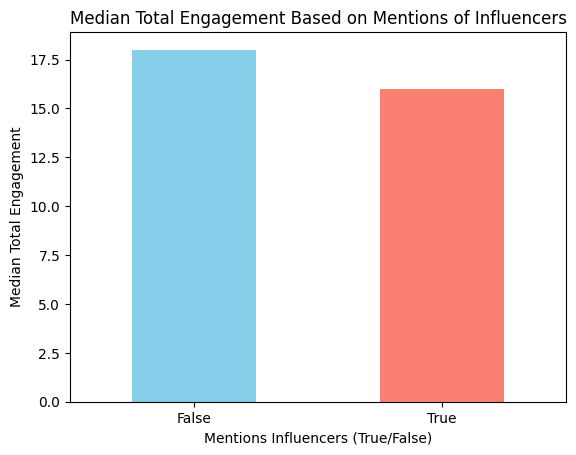

In [3]:
avg_engagement = df.groupby('mentions_influencers')['total_engagement'].median()

avg_engagement.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Median Total Engagement Based on Mentions of Influencers')
plt.xlabel('Mentions Influencers (True/False)')
plt.ylabel('Median Total Engagement')
plt.xticks(rotation=0)
plt.show()

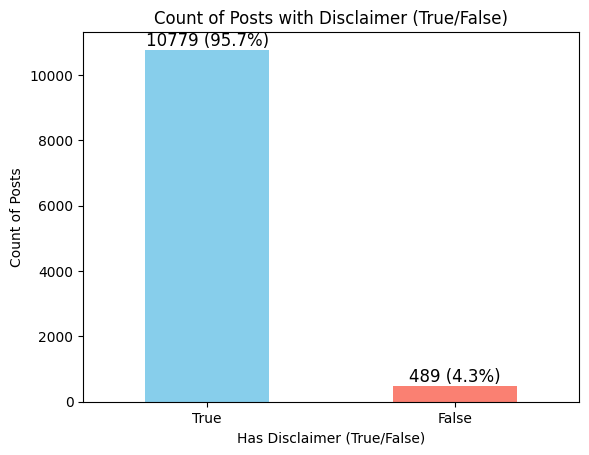

In [4]:
disclaimer_counts = df['has_disclaimer'].value_counts()
ax = disclaimer_counts.plot(kind='bar', color=['skyblue', 'salmon'])
total_posts = len(df)
percentages = (disclaimer_counts / total_posts) * 100
disclaimer_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Posts with Disclaimer (True/False)')
plt.xlabel('Has Disclaimer (True/False)')
plt.ylabel('Count of Posts')
plt.xticks(ticks=[0, 1], labels=['True', 'False'], rotation=0)
for i, (count, percentage) in enumerate(zip(disclaimer_counts, percentages)):
    label = f'{count} ({percentage:.1f}%)'
    ax.text(i, count + 0.1, label, ha='center', va='bottom', fontsize=12)
plt.show()

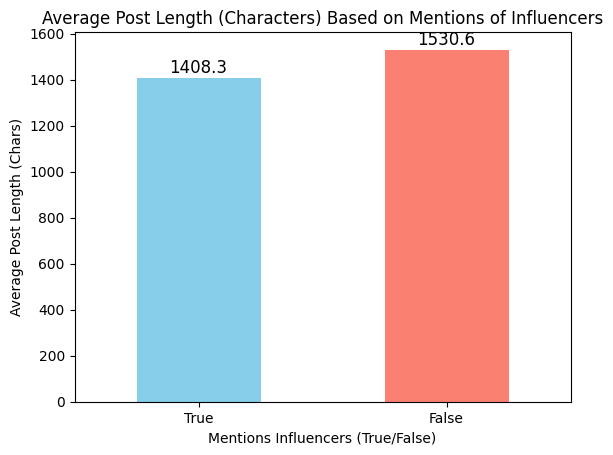

In [5]:
avg_post_length = df.groupby('mentions_influencers')['post_length_chars'].mean()

ax = avg_post_length.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Average Post Length (Characters) Based on Mentions of Influencers')
plt.xlabel('Mentions Influencers (True/False)')
plt.ylabel('Average Post Length (Chars)')

plt.xticks(ticks=[0, 1], labels=['True', 'False'], rotation=0)

for i, v in enumerate(avg_post_length):
    ax.text(i, v + 5, f'{v:.1f}', ha='center', va='bottom', fontsize=12)

plt.show()

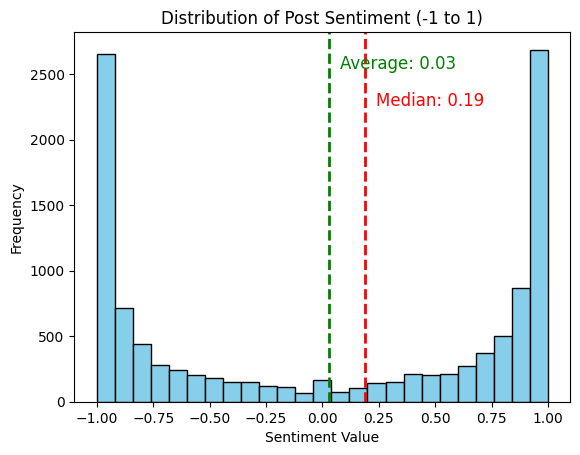

In [6]:
sentiment_distribution = df['post_sentiment'].value_counts().sort_index()
average_sentiment = df['post_sentiment'].mean()
median_sentiment = df['post_sentiment'].median()

plt.hist(df['post_sentiment'], bins=25, color='skyblue', edgecolor='black')
plt.title('Distribution of Post Sentiment (-1 to 1)')
plt.xlabel('Sentiment Value')
plt.ylabel('Frequency')
plt.axvline(average_sentiment, color='green', linestyle='dashed', linewidth=2, label=f'Average: {average_sentiment:.2f}')
plt.axvline(median_sentiment, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_sentiment:.2f}')
plt.text(average_sentiment + 0.05, plt.ylim()[1]*0.9, f'Average: {average_sentiment:.2f}', 
         color='green', fontsize=12, horizontalalignment='left')
plt.text(median_sentiment + 0.05, plt.ylim()[1]*0.8, f'Median: {median_sentiment:.2f}', 
         color='red', fontsize=12, horizontalalignment='left')
plt.show()

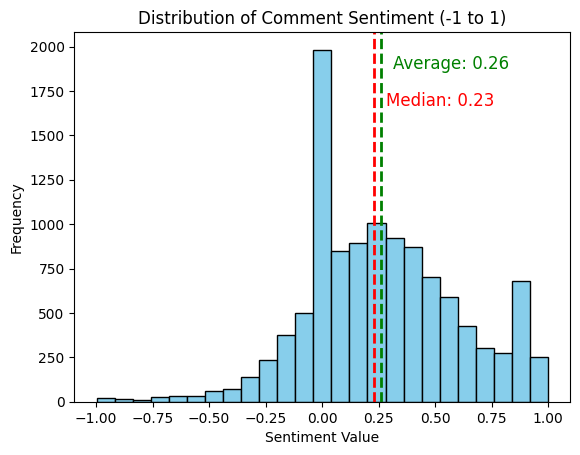

In [7]:
sentiment_distribution = df['post_sentiment'].value_counts().sort_index()
average_sentiment = df['avg_comment_sentiment'].mean()
median_sentiment = df['avg_comment_sentiment'].median()

plt.hist(df['avg_comment_sentiment'], bins=25, color='skyblue', edgecolor='black')
plt.title('Distribution of Comment Sentiment (-1 to 1)')
plt.xlabel('Sentiment Value')
plt.ylabel('Frequency')
plt.axvline(average_sentiment, color='green', linestyle='dashed', linewidth=2, label=f'Average: {average_sentiment:.2f}')
plt.axvline(median_sentiment, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_sentiment:.2f}')
plt.text(average_sentiment + 0.05, plt.ylim()[1]*0.9, f'Average: {average_sentiment:.2f}', 
         color='green', fontsize=12, horizontalalignment='left')
plt.text(median_sentiment + 0.05, plt.ylim()[1]*0.8, f'Median: {median_sentiment:.2f}', 
         color='red', fontsize=12, horizontalalignment='left')
plt.show()

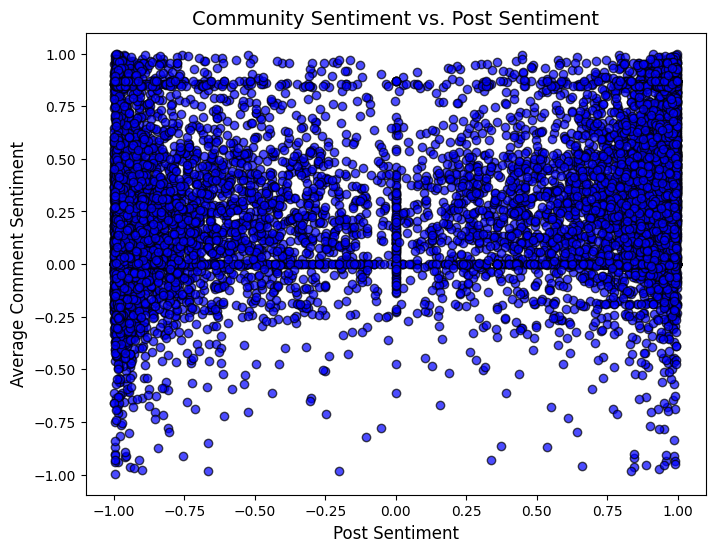

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(df['post_sentiment'], df['avg_comment_sentiment'], color='blue', edgecolor='black', alpha=0.7)

plt.title('Community Sentiment vs. Post Sentiment', fontsize=14)
plt.xlabel('Post Sentiment', fontsize=12)
plt.ylabel('Average Comment Sentiment', fontsize=12)

plt.show()

In [9]:
df['total_engagement'].corr(df['post_length_chars'])

np.float64(0.042261895969359635)

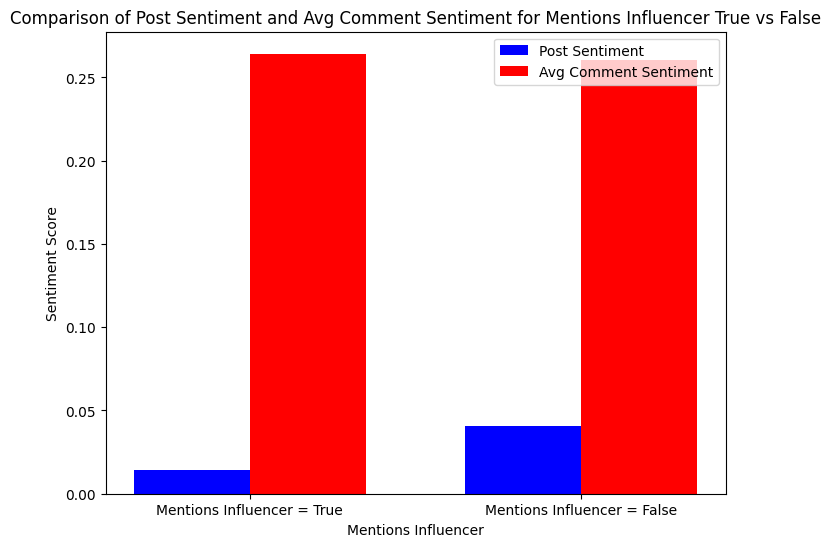

In [10]:
grouped = df.groupby('mentions_influencers').agg({
    'post_sentiment': 'mean',
    'avg_comment_sentiment': 'mean'
}).reset_index()

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.35
index = grouped['mentions_influencers'].astype(str)

positions = [0, 1]

ax.bar(positions[0] - bar_width/2, grouped['post_sentiment'][0], bar_width, label='Post Sentiment', color='b')
ax.bar(positions[0] + bar_width/2, grouped['avg_comment_sentiment'][0], bar_width, label='Avg Comment Sentiment', color='r')

ax.bar(positions[1] - bar_width/2, grouped['post_sentiment'][1], bar_width, color='b')
ax.bar(positions[1] + bar_width/2, grouped['avg_comment_sentiment'][1], bar_width, color='r')

ax.set_xticks(positions)
ax.set_xticklabels(['Mentions Influencer = True', 'Mentions Influencer = False'])
ax.set_xlabel('Mentions Influencer')
ax.set_ylabel('Sentiment Score')
ax.set_title('Comparison of Post Sentiment and Avg Comment Sentiment for Mentions Influencer True vs False')
ax.legend()

plt.show()

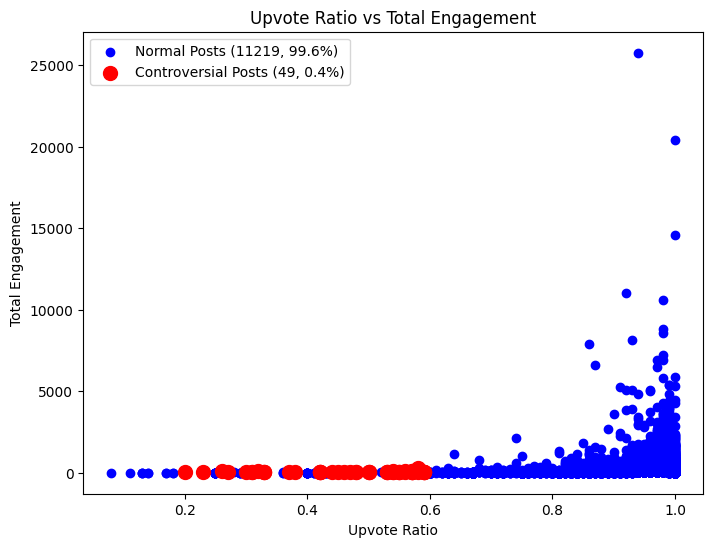

In [15]:
median_engagement = df['total_engagement'].median()

controversial_posts = df[(df['upvote_ratio'] < 0.60) & (df['total_engagement'] > median_engagement)]

num_normal_posts = len(df) - len(controversial_posts)
num_controversial_posts = len(controversial_posts)

total_posts = len(df)
percent_normal_posts = (num_normal_posts / total_posts) * 100
percent_controversial_posts = (num_controversial_posts / total_posts) * 100

plt.figure(figsize=(8, 6))
plt.scatter(df['upvote_ratio'], df['total_engagement'], color='blue', label=f'Normal Posts ({num_normal_posts}, {percent_normal_posts:.1f}%)')

plt.scatter(controversial_posts['upvote_ratio'], controversial_posts['total_engagement'], color='red', 
            label=f'Controversial Posts ({num_controversial_posts}, {percent_controversial_posts:.1f}%)', marker='o', s=100)

plt.title('Upvote Ratio vs Total Engagement')
plt.xlabel('Upvote Ratio')
plt.ylabel('Total Engagement')
plt.legend()

plt.show()